In [1]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(5, 5)
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.figdir = '../figures'
#results_file = './write/results.h5ad'


%load_ext autoreload
%autoreload 2 

/home/icb/carlo.dedonno/anaconda3/envs/deepcell2/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
adata = sc.read('../data/processed/sciplex3processed.h5ad')

# QC

In [3]:
# Quality control - calculate QC covariates
# adata.X = adata.X.toarray()
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

Trying to set attribute `.uns` of view, copying.


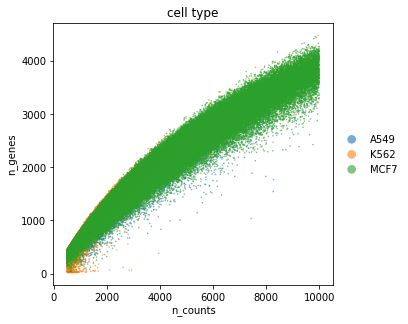

In [4]:
#Data quality summary plots
#plt.rcParams['figure.figsize'] = (10, 10)
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='cell_type', size=10, alpha=0.6)

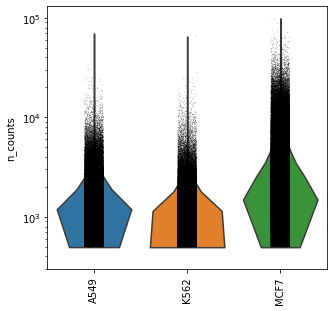

In [5]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='cell_type', size=0.5, log=True, cut=0, rotation=90)
#t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

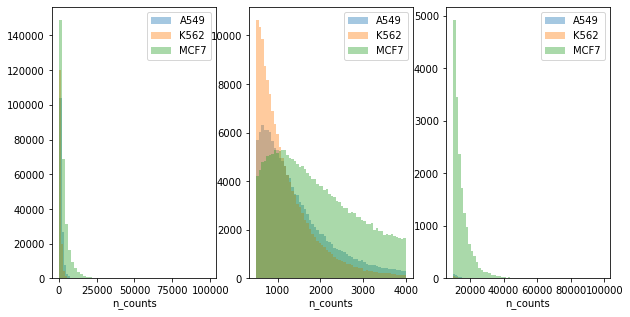

In [6]:
#Thresholding decision: counts
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549'], kde=False, ax=ax[0])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562'], kde=False, ax=ax[0])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7'], kde=False, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
ax[2].legend(['A549', 'K562', 'MCF7'])


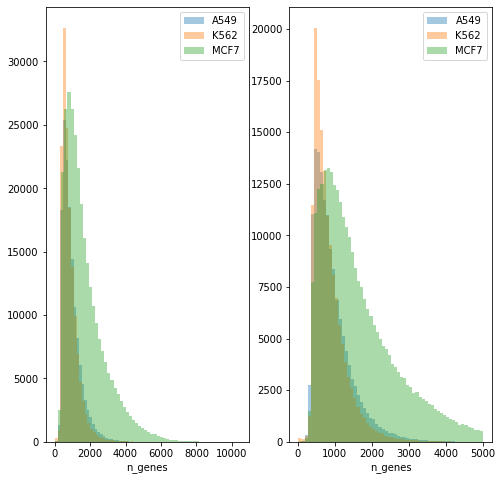

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7'], kde=False, bins=60, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])

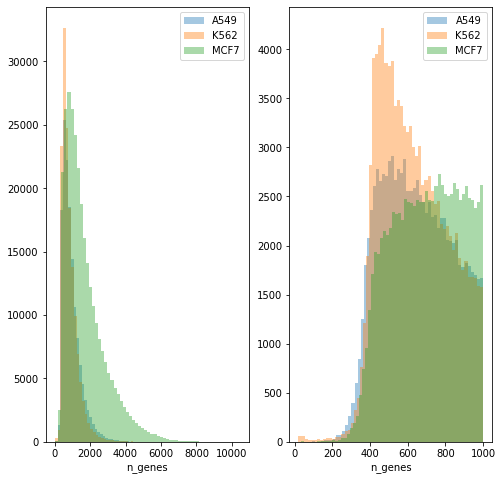

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7'], kde=False, bins=60, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])

In [9]:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=50)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 58347
filtered out 27520 genes that are detected in less than 50 cells
Number of genes after cell filter: 30827


(array([1165.,  938.,  733.,  639.,  558.,  513.,  463.,  396.,  328.,
         344.]),
 array([ 50. ,  64.9,  79.8,  94.7, 109.6, 124.5, 139.4, 154.3, 169.2,
        184.1, 199. ]),
 <a list of 10 Patch objects>)

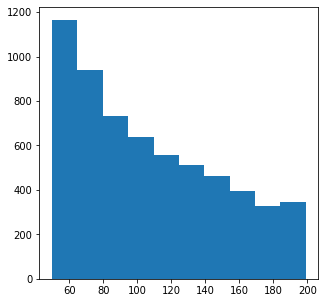

In [10]:
plt.hist(adata.var['n_cells'][adata.var['n_cells']<200])

# Normalization

In [11]:
#Keep the count data in a counts layer
adata.layers["counts"] = adata.X.copy()

In [12]:
from scipy.sparse import csr_matrix

r,c = adata.X.nonzero()
rD_sp = csr_matrix(((1.0/adata.obs['size_factor'].values)[r], (r,c)), shape=(adata.X.shape))
adata.X = adata.X.multiply(rD_sp)

In [13]:
#Normalize adata 
#adata.X /= adata.obs['size_factor'].values[:,None]
sc.pp.log1p(adata)

In [14]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
adata.raw = adata

# HVG

In [15]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=7000, subset=True)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 6999


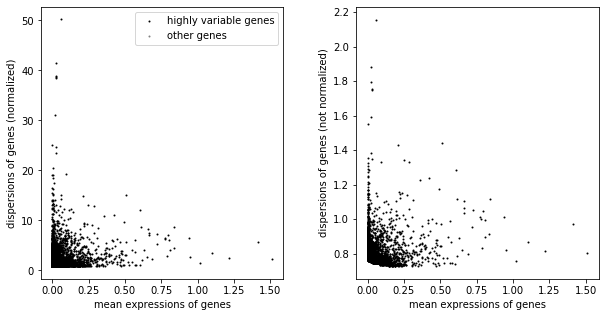

In [16]:
sc.pl.highly_variable_genes(adata)

# Find most effective drugs

In [17]:
sc.tl.rank_genes_groups(adata, use_raw=False, groupby='product_name', reference='Vehicle', key_added='rank_genes_product')

ranking genes
    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


In [18]:
pvals_stack = pd.DataFrame.from_records(adata.uns['rank_genes_product']['pvals_adj']).stack().reset_index()

In [19]:
pvals_stack['significant'] = (pvals_stack[0] < 0.001)

In [20]:
pvals_sign = pd.DataFrame({'product': pvals_stack['level_1'].unique(), 'ndeg': pvals_stack.groupby('level_1')['significant'].sum()})
pvals_sign = pvals_sign.sort_values(['ndeg'], ascending=False).reset_index(drop=True)

[Text(0, 0, '2-Methoxyestradiol (2-MeOE2)'),
 Text(0, 0, 'CUDC-101'),
 Text(0, 0, 'Trametinib (GSK1120212)'),
 Text(0, 0, 'PFI-1 (PF-6405761)'),
 Text(0, 0, 'Givinostat (ITF2357)'),
 Text(0, 0, 'Pracinostat (SB939)'),
 Text(0, 0, 'Belinostat (PXD101)'),
 Text(0, 0, 'Tacedinaline (CI994)'),
 Text(0, 0, 'Panobinostat (LBH589)'),
 Text(0, 0, 'CUDC-907'),
 Text(0, 0, 'Trichostatin A (TSA)'),
 Text(0, 0, 'GSK-LSD1 2HCl'),
 Text(0, 0, 'Fulvestrant'),
 Text(0, 0, 'Dacinostat (LAQ824)'),
 Text(0, 0, 'Dasatinib'),
 Text(0, 0, 'Entinostat (MS-275)'),
 Text(0, 0, 'Resminostat'),
 Text(0, 0, 'Raltitrexed'),
 Text(0, 0, 'Triamcinolone Acetonide'),
 Text(0, 0, 'Tanespimycin (17-AAG)'),
 Text(0, 0, 'Quisinostat (JNJ-26481585) 2HCl'),
 Text(0, 0, 'M344'),
 Text(0, 0, 'AR-42'),
 Text(0, 0, 'Abexinostat (PCI-24781)'),
 Text(0, 0, 'Luminespib (AUY-922, NVP-AUY922)'),
 Text(0, 0, 'Mocetinostat (MGCD0103)'),
 Text(0, 0, 'YM155 (Sepantronium Bromide)'),
 Text(0, 0, 'Hesperadin'),
 Text(0, 0, 'Alvespimycin (

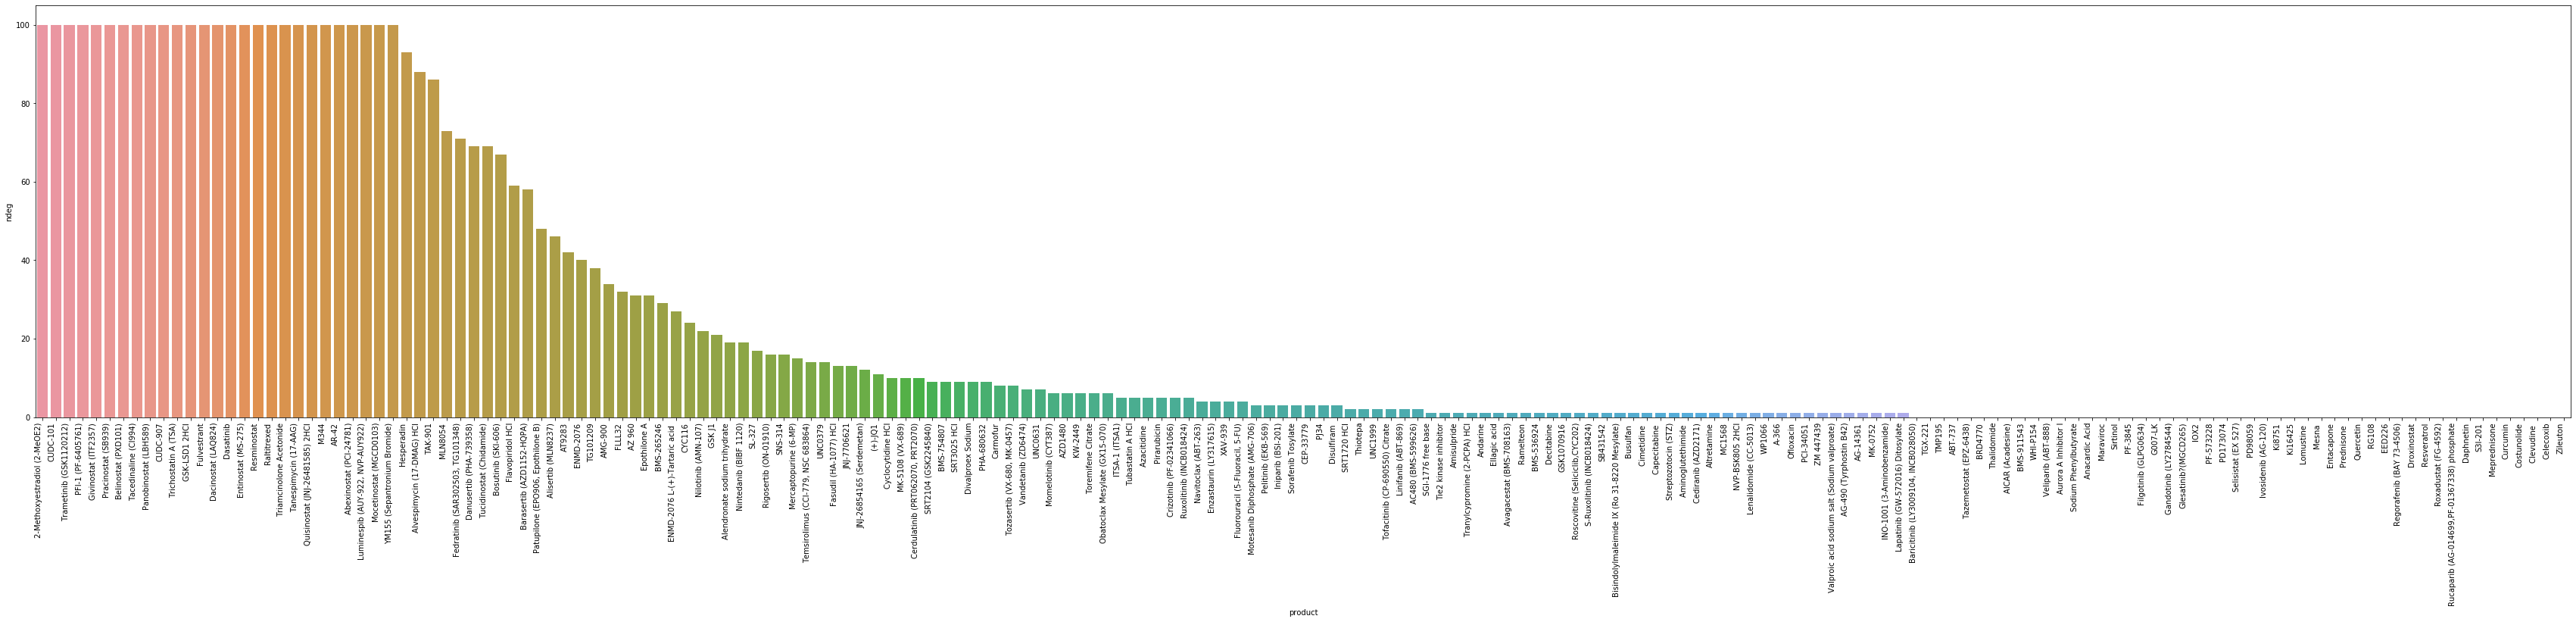

In [21]:
plt.rcParams['figure.figsize'] = (60, 10)
plot = sns.barplot(x='product', y='ndeg', data=pvals_sign)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [22]:
effective_drugs = list(pvals_sign['product'][pvals_sign['ndeg']>20])

In [23]:
effective_drugs.append('Vehicle')

In [24]:
adata_eff = adata[adata.obs['product_name'].isin(effective_drugs)]

In [25]:
adata_eff

View of AnnData object with n_obs × n_vars = 147765 × 6999 
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_counts', 'log_counts', 'n_genes'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'log1p', 'rank_genes_product'
    layers: 'counts'

# Check most effective drugs per cell line

A549
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
K562
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
MCF7
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


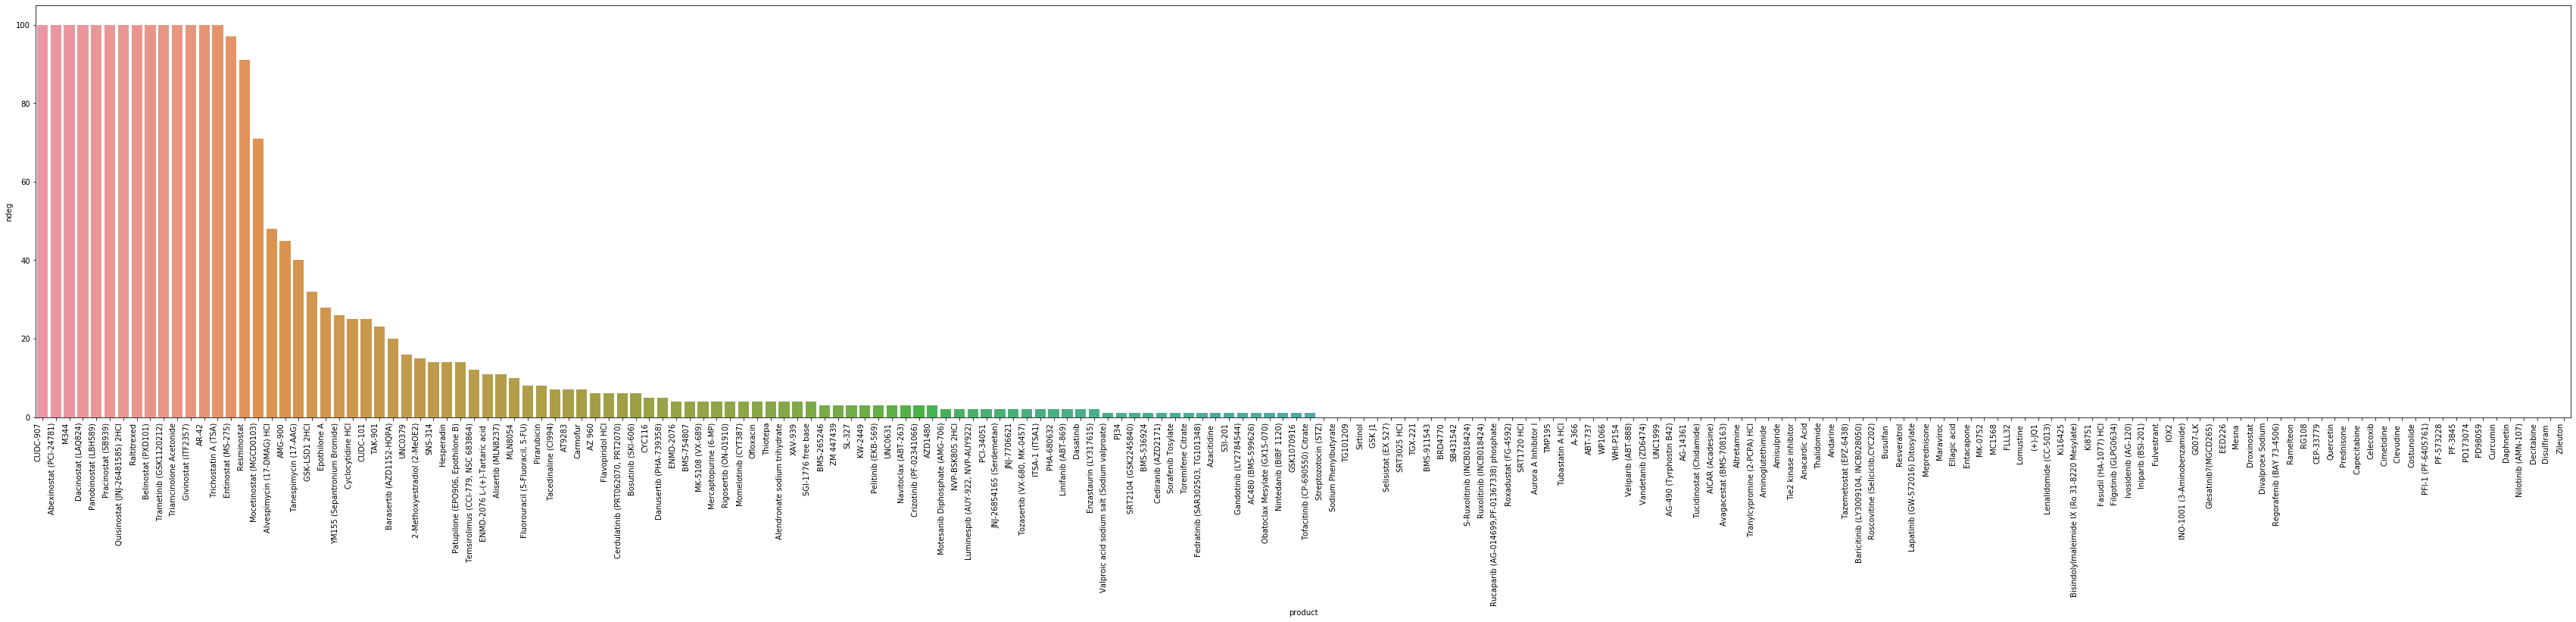

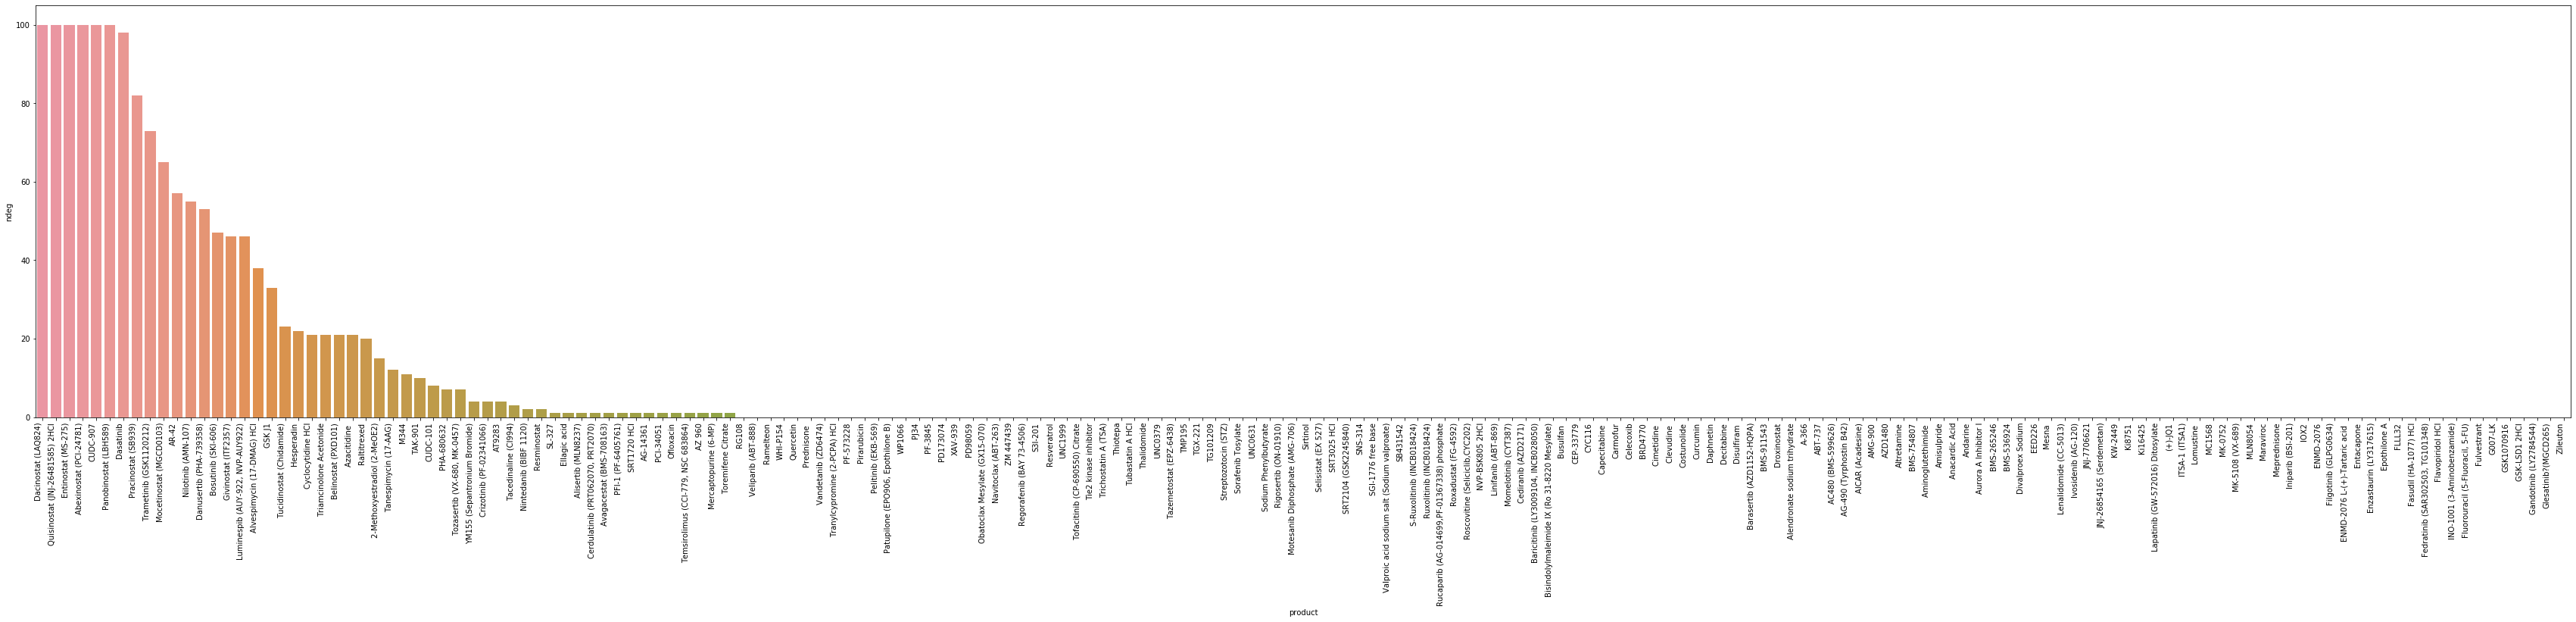

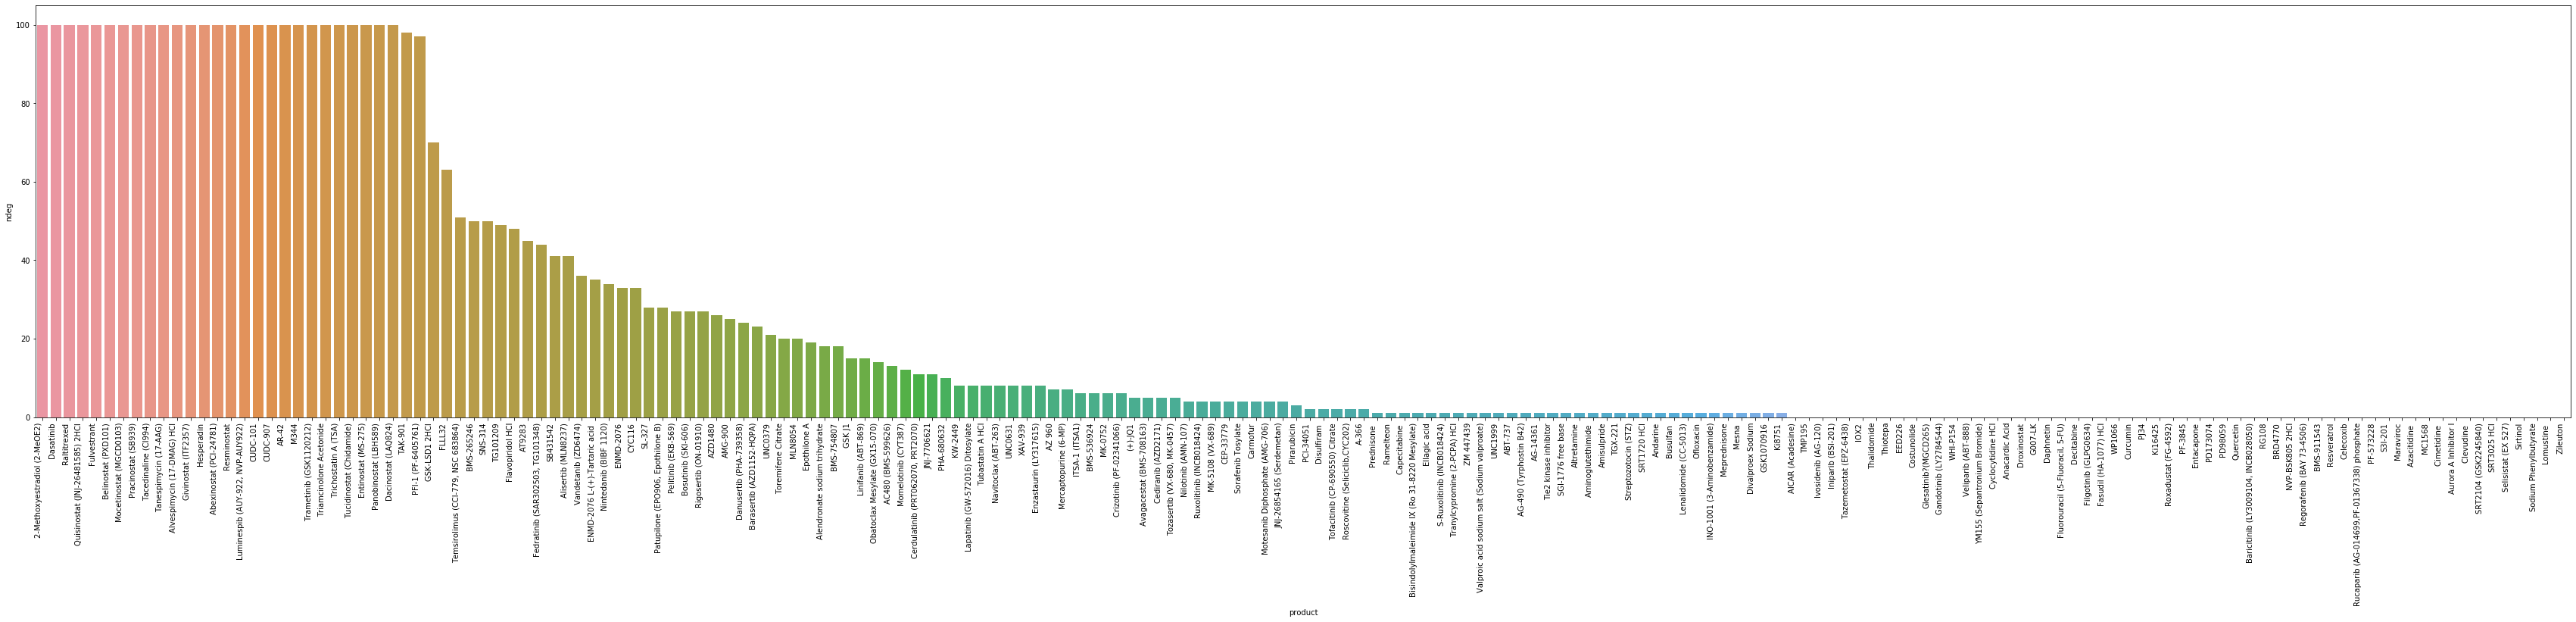

In [26]:
effective_drugs_cell = dict()
for cell_type in list(adata.obs['cell_type'].cat.categories):
    print(cell_type)
    adata_cell = adata[adata.obs['cell_type']==cell_type]
    sc.tl.rank_genes_groups(adata_cell, use_raw=False, groupby='product_name', reference='Vehicle', key_added='rank_genes_product')
    pvals_stack = pd.DataFrame.from_records(adata_cell.uns['rank_genes_product']['pvals_adj']).stack().reset_index()
    pvals_stack['significant'] = (pvals_stack[0] < 0.01)
    pvals_sign = pd.DataFrame({'product': pvals_stack['level_1'].unique(), 'ndeg': pvals_stack.groupby('level_1')['significant'].sum()})
    pvals_sign = pvals_sign.sort_values(['ndeg'], ascending=False).reset_index(drop=True)
    effective_drugs_cell[cell_type] = list(pvals_sign['product'][pvals_sign['ndeg']>20])
    effective_drugs_cell[cell_type].append('Vehicle')
    
    plt.rcParams['figure.figsize'] = (60, 10)
    plt.figure()
    plot = sns.barplot(x='product', y='ndeg', data=pvals_sign)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [27]:
effective_drugs_intersection = list(set(effective_drugs_cell['A549']).intersection(set(effective_drugs_cell['K562']), set(effective_drugs_cell['MCF7'])))
effective_drugs_union = list(set(effective_drugs_cell['A549']).union(set(effective_drugs_cell['K562']), set(effective_drugs_cell['MCF7'])))

In [28]:
effective_drugs_cell

{'A549': ['CUDC-907',
  'Abexinostat (PCI-24781)',
  'M344',
  'Dacinostat (LAQ824)',
  'Panobinostat (LBH589)',
  'Pracinostat (SB939)',
  'Quisinostat (JNJ-26481585) 2HCl',
  'Raltitrexed',
  'Belinostat (PXD101)',
  'Trametinib (GSK1120212)',
  'Triamcinolone Acetonide',
  'Givinostat (ITF2357)',
  'AR-42',
  'Trichostatin A (TSA)',
  'Entinostat (MS-275)',
  'Resminostat',
  'Mocetinostat (MGCD0103)',
  'Alvespimycin (17-DMAG) HCl',
  'AMG-900',
  'Tanespimycin (17-AAG)',
  'GSK-LSD1 2HCl',
  'Epothilone A',
  'YM155 (Sepantronium Bromide)',
  'Cyclocytidine HCl',
  'CUDC-101',
  'TAK-901',
  'Vehicle'],
 'K562': ['Dacinostat (LAQ824)',
  'Quisinostat (JNJ-26481585) 2HCl',
  'Entinostat (MS-275)',
  'Abexinostat (PCI-24781)',
  'CUDC-907',
  'Panobinostat (LBH589)',
  'Dasatinib',
  'Pracinostat (SB939)',
  'Trametinib (GSK1120212)',
  'Mocetinostat (MGCD0103)',
  'AR-42',
  'Nilotinib (AMN-107)',
  'Danusertib (PHA-739358)',
  'Bosutinib (SKI-606)',
  'Givinostat (ITF2357)',
  'Lu

In [29]:
adatas_cell = []
for cell_type, _ in effective_drugs_cell.items():
    adatas_cell.append(adata[(adata.obs['cell_type'] == cell_type) & (adata.obs['product_name'].isin(effective_drugs_cell[cell_type]))])
adata_eff_cell = adatas_cell[0].concatenate(adatas_cell[1:])
del adatas_cell

adata_eff_intersection = adata[adata.obs['product_name'].isin(effective_drugs_intersection)]
adata_eff_union = adata[adata.obs['product_name'].isin(effective_drugs_union)]

In [39]:
adata.obs['eff_intersection'] = (adata.obs['product_name'].isin(effective_drugs_intersection))
adata.obs['eff_cell'] = (adata.obs['product_name'].isin(effective_drugs_union))

In [30]:
sc.pp.neighbors(adata_eff_cell)
sc.tl.umap(adata_eff_cell)
sc.pp.neighbors(adata_eff_intersection)
sc.tl.umap(adata_eff_intersection)
sc.pp.neighbors(adata_eff_union)
sc.tl.umap(adata_eff_union)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:01:51)


/home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parall

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:02:41)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:33)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:00:46)


/home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:01:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:52)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:02:40)


/home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../home/icb/carlo.dedonno/anaconda3/envs/deepcell/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:03:52)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:52)


... storing 'cell_type' as categorical
... storing 'pathway' as categorical
... storing 'pathway_level_1' as categorical
... storing 'pathway_level_2' as categorical
... storing 'product_dose' as categorical
... storing 'product_name' as categorical
... storing 'target' as categorical


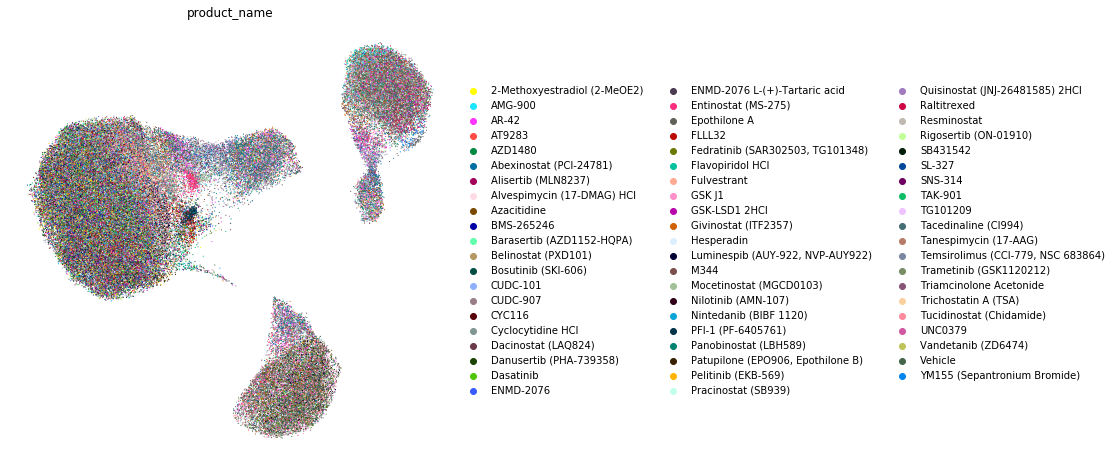

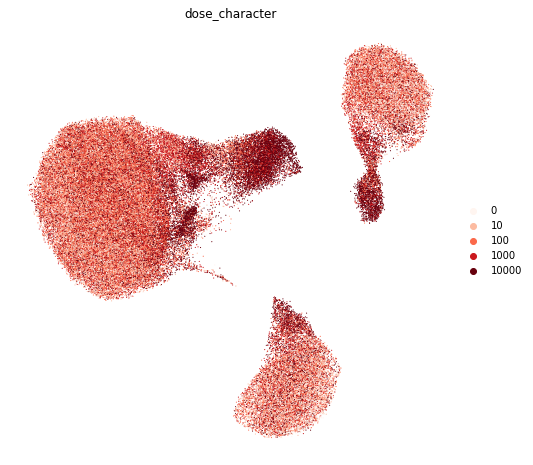

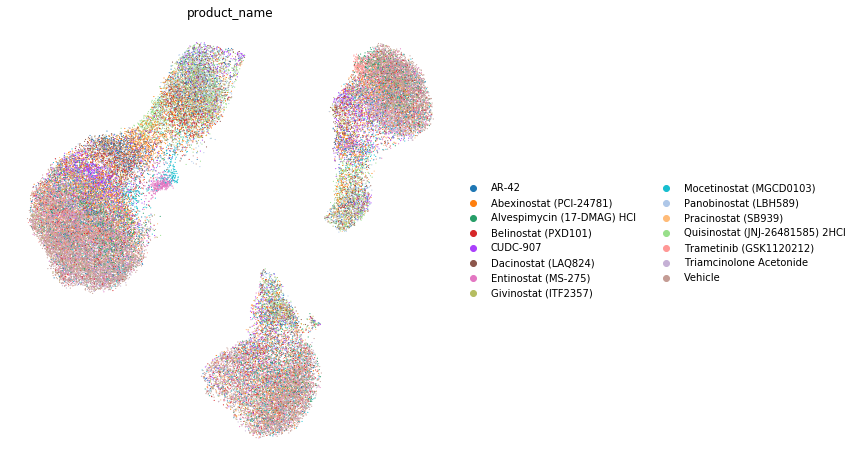

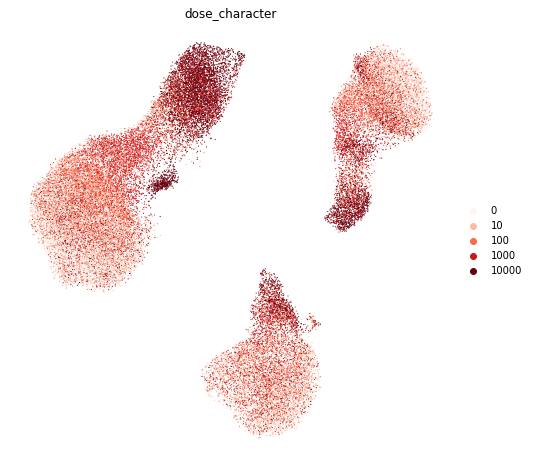

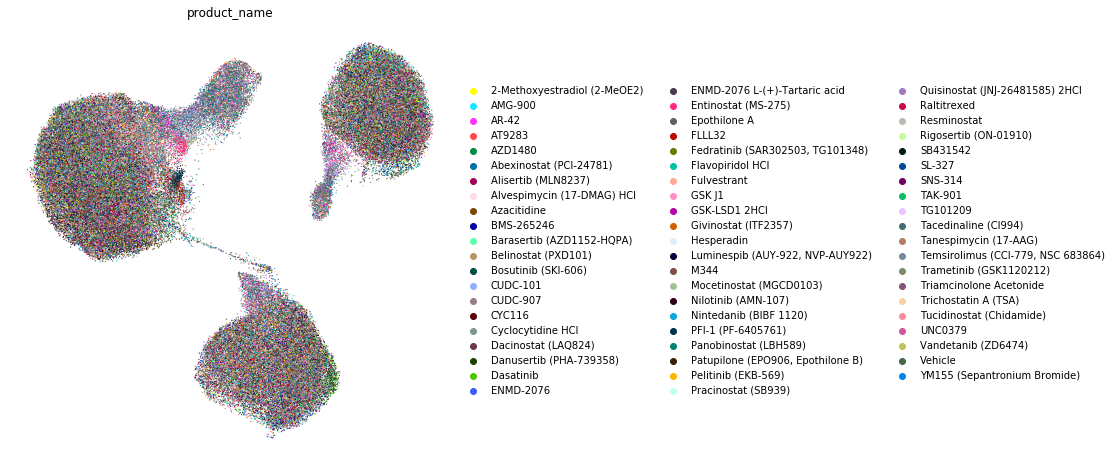

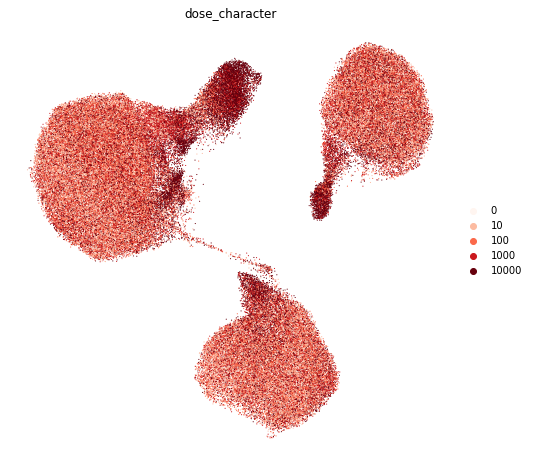

In [31]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.umap(adata_eff_cell, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_cell, size=5, color='dose_character', palette='Reds', frameon=False)
sc.pl.umap(adata_eff_intersection, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_intersection, size=5, color='dose_character', palette='Reds', frameon=False)
sc.pl.umap(adata_eff_union, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_union, size=5, color='dose_character', palette='Reds', frameon=False)

In [40]:
adata.write('../data/processed/sciplex3processed.h5ad')

# trVAE

In [3]:
import trvaep as tr
import anndata as ad

In [4]:
CONDITION_KEY = 'product_name'

In [5]:
adata_trvae = adata[adata.obs['eff_intersection']].copy()
adata_new = ad.AnnData(X=adata_trvae.X.A, obs=adata_trvae.obs, var=adata_trvae.var)
n_conditions = adata_trvae.obs[CONDITION_KEY].unique().shape[0]

In [6]:
n_conditions

15

In [7]:
adata_train = adata_new[~((adata_new.obs["cell_type"] == "A549")
                      & (adata_new.obs["product_name"] == 'Panobinostat (LBH589)'))]

In [8]:
adata_train.X

ArrayView([[0.        , 0.        , 1.0770077 , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           ...,
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.38340884, 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ]], dtype=float32)

In [9]:
model = tr.CVAE(adata_train.n_vars, num_classes=n_conditions,
            output_activation="ReLU", encoder_layer_sizes=[64, 32], decoder_layer_sizes=[32, 64], use_mmd=True, beta=1)

In [10]:
trainer = tr.Trainer(model, adata_train, condition_key=CONDITION_KEY, print_every=1)

In [11]:
import torch
torch.get_num_threads()

24

In [12]:
torch.set_num_threads(8)

In [13]:
print(adata_train.shape)

(50458, 6999)


In [ ]:
trainer.train_trvae(n_epochs=1, batch_size=512, early_patience=50)